In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates
import datetime
import time

In [5]:
filenames = [
    '20220328_1st-rot.dat',
    '20220328_2nd-rot.dat',
    '20220328_3rd-rot.dat',
    '20220328_4th-rot.dat',
    #'20220328_5th-rot.dat',
]

labels=[
    '1st',
    '2nd',
    '3rd',
    '4th',
    '5th',
]

times = []
x_angles = []
y_angles = []
for filename in filenames:
    data = np.loadtxt(filename)
    time = [ datetime.datetime.fromtimestamp(_time) for _time in data[:,0] ] # convert: unix time --> datetime
    x_angle = data[:,1]
    y_angle = data[:,2]
    times.append(time)
    x_angles.append(x_angle)
    y_angles.append(y_angle)
    pass;

times = np.array(times)
x_angles = np.array(x_angles)
y_angles = np.array(y_angles)
print(times)
print(x_angles)
print(y_angles)

[list([datetime.datetime(2022, 3, 28, 18, 0, 8, 502110), datetime.datetime(2022, 3, 28, 18, 0, 8, 703374), datetime.datetime(2022, 3, 28, 18, 0, 8, 914967), datetime.datetime(2022, 3, 28, 18, 0, 9, 122945), datetime.datetime(2022, 3, 28, 18, 0, 9, 327763), datetime.datetime(2022, 3, 28, 18, 0, 9, 537531), datetime.datetime(2022, 3, 28, 18, 0, 9, 746411), datetime.datetime(2022, 3, 28, 18, 0, 9, 952123), datetime.datetime(2022, 3, 28, 18, 0, 10, 159706), datetime.datetime(2022, 3, 28, 18, 0, 10, 366850), datetime.datetime(2022, 3, 28, 18, 0, 10, 573768), datetime.datetime(2022, 3, 28, 18, 0, 10, 779169), datetime.datetime(2022, 3, 28, 18, 0, 10, 981111), datetime.datetime(2022, 3, 28, 18, 0, 11, 191314), datetime.datetime(2022, 3, 28, 18, 0, 11, 394161), datetime.datetime(2022, 3, 28, 18, 0, 11, 596568), datetime.datetime(2022, 3, 28, 18, 0, 11, 800690), datetime.datetime(2022, 3, 28, 18, 0, 12, 6379), datetime.datetime(2022, 3, 28, 18, 0, 12, 213012), datetime.datetime(2022, 3, 28, 18,

/Users/shadachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/shadachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/shadachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

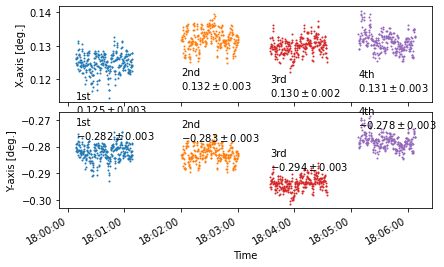

In [9]:
fig, axs = plt.subplots(2,1)
fig.tight_layout()
colors = ['tab:blue', 'tab:orange', 'tab:red', 'tab:purple', 'tab:green']
timeFmt = dates.DateFormatter('%H:%M:%S')
fig.autofmt_xdate()

x_means = []
y_means = []
x_stds = []
y_stds = []
for i in range(len(times)):
    time = times[i]
    x_angle = x_angles[i]
    y_angle = y_angles[i]
    label = labels[i]
    x_mean = np.mean(x_angle)
    y_mean = np.mean(y_angle)
    x_std = np.std(x_angle)
    y_std = np.std(y_angle)
    
    x_means.append(x_mean)
    y_means.append(y_mean)
    x_stds.append(x_std)
    y_stds.append(y_std)
    
    ax = axs[0]
    ax.plot(time, x_angle, linestyle='', markersize=1., marker='o', color=colors[i])
    ax.xaxis.set_major_formatter(timeFmt)
    ax.text(time[0], x_mean-0.015, f'{label}\n${x_mean:.3f}\pm{x_std:.3f}$')
    ax.set_ylabel('X-axis [deg.]')
    ax.grid()
    
    ax = axs[1]
    ax.plot(time, y_angle, linestyle='', markersize=1., marker='o', color=colors[i])
    ax.text(time[0], y_mean+0.005, f'{label}\n${y_mean:.3f}\pm{y_std:.3f}$')
    ax.set_xlabel('Time')
    ax.set_ylabel('Y-axis [deg.]')
    ax.grid()
    
    ax.xaxis.set_major_formatter(timeFmt)
    pass
plt.subplots_adjust(wspace=0.4, hspace=0.1, top=0.9)

In [14]:
x_ave = np.mean(x_means)
y_ave = np.mean(y_means)
x_err = np.sqrt(np.sum(np.power(x_stds,2.)))
y_err = np.sqrt(np.sum(np.power(y_stds,2.)))

print(f'x-axis: average = {x_ave:.3f}+-{x_err:.3f} deg.')
print(f'y-axis: average = {y_ave:.3f}+-{y_err:.3f} deg.')

x_diff = np.array(x_means) - x_ave
y_diff = np.array(y_means) - y_ave
print(f'x-axis diff = {x_diff}')
print(f'y-axis diff = {y_diff}')
for (i, x,y) in zip(range(len(x_diff)), x_diff,y_diff):
    print(f'i={i}: x diff = {x:.3f}')
    print(f'i={i}: y diff = {y:.3f}')
    pass

x-axis: average = 0.129+-0.006 deg.
y-axis: average = -0.284+-0.006 deg.
x-axis diff = [-0.00479059  0.00259586  0.00037483  0.0018199 ]
y-axis diff = [ 0.00198787  0.0013444  -0.00957178  0.00623952]
i=0: x diff = -0.005
i=0: y diff = 0.002
i=1: x diff = 0.003
i=1: y diff = 0.001
i=2: x diff = 0.000
i=2: y diff = -0.010
i=3: x diff = 0.002
i=3: y diff = 0.006
